    Jacob Knopping
    3/6/2020
    
   ### 27.7 Challenge: Make a Neural Network

The dataset used for this challenge is the Breast Cancer Wisconsin (Diagnostic) dataset from Kaggle (https://www.kaggle.com/uciml/breast-cancer-wisconsin-data). Task:

    Create a multi-layer perceptron neural network model to predict on a labeled dataset of your choosing. Compare this model to either a boosted tree or a random forest model and describe the relative tradeoffs between complexity and accuracy. Be sure to vary the hyperparameters of your MLP!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Neural network from Sci-kit learn
from sklearn.neural_network import MLPClassifier

#Random Forest model
from sklearn import ensemble

#For evaluation
from sklearn.model_selection import cross_val_score

In [2]:
#Read csv file into dataframe
df = pd.read_csv('breast-cancer-wisconsin-data.csv')
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)

In [3]:
df.shape

(569, 32)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

### Data Cleaning (Missing Values and Outliers)

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# Confirm there is no missing data
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There are no missing values for this dataset. Additionally, the 'id' column can be dropped.

In [8]:
# drop ID column
df = df.drop('id', axis=1)

In [9]:
#Get dummies for 'diagnosis'
df['diagnosis'] = pd.get_dummies(df.diagnosis, drop_first=True)

In [10]:
# 1 = malignant
df.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [11]:
# store and then drop y (target labels) for now
y = df.diagnosis
df = df.drop('diagnosis', axis =1)

In [12]:
fill_list = list(df.columns)

#Detecting outliers using Tukey's method(IQR range)
for column in fill_list:
    q75, q25 = np.percentile(df[column], [75 ,25])
    iqr = q75 - q25
    #This method considers all values that are outside the threshold of 1.5 times the IQR as outliers
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers in {}: {}".format(
        column, 
        len((np.where((df[column] > max_val) | (df[column] < min_val))[0]))))

Number of outliers in radius_mean: 14
Number of outliers in texture_mean: 7
Number of outliers in perimeter_mean: 13
Number of outliers in area_mean: 25
Number of outliers in smoothness_mean: 6
Number of outliers in compactness_mean: 16
Number of outliers in concavity_mean: 18
Number of outliers in concave points_mean: 10
Number of outliers in symmetry_mean: 15
Number of outliers in fractal_dimension_mean: 15
Number of outliers in radius_se: 38
Number of outliers in texture_se: 20
Number of outliers in perimeter_se: 38
Number of outliers in area_se: 65
Number of outliers in smoothness_se: 30
Number of outliers in compactness_se: 28
Number of outliers in concavity_se: 22
Number of outliers in concave points_se: 19
Number of outliers in symmetry_se: 27
Number of outliers in fractal_dimension_se: 28
Number of outliers in radius_worst: 17
Number of outliers in texture_worst: 5
Number of outliers in perimeter_worst: 15
Number of outliers in area_worst: 35
Number of outliers in smoothness_wo

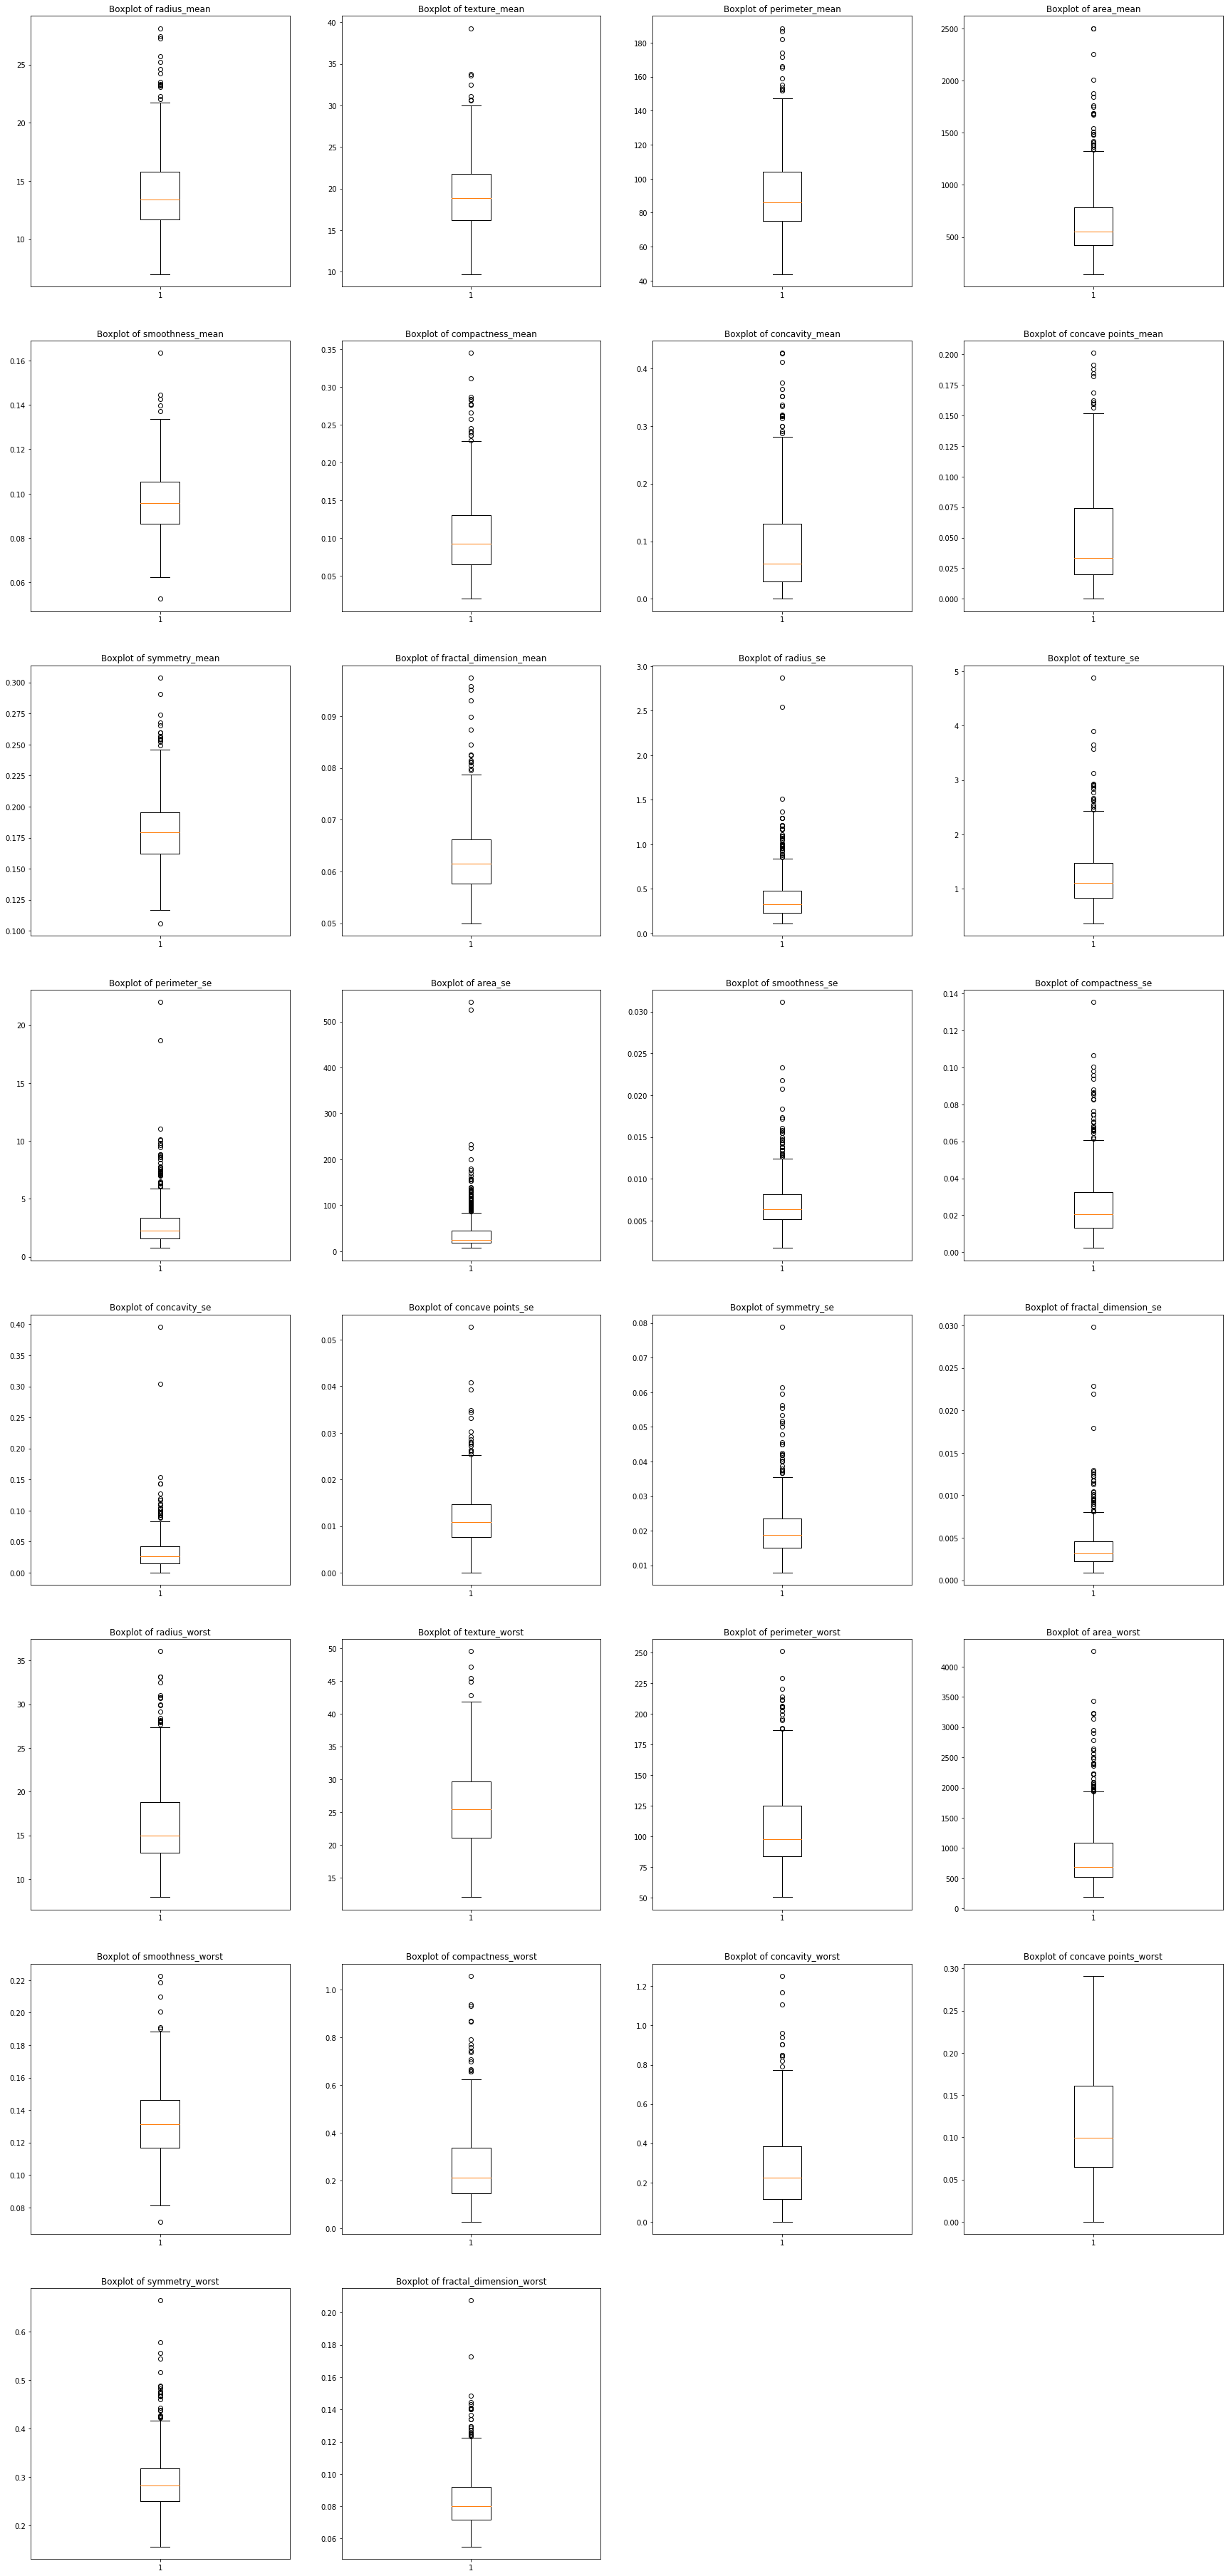

In [13]:
df_copy = df

#Visual examination of outliers:
plt.figure(figsize=(30,250))

for i, column in enumerate(fill_list):
    plt.subplot(len(fill_list), 4, i+1)
    plt.boxplot(df_copy[column])
    plt.title("Boxplot of {}".format(column))
    
plt.show()

In [14]:
# Apply two-way winsorization to deal with outliers
from scipy.stats.mstats import winsorize

for column in fill_list:
    df_copy[column] = winsorize(df_copy[column], (.05, .05))

In [15]:
#Detecting outliers using Tukey's method(IQR range)
for column in fill_list:
    q75, q25 = np.percentile(df_copy[column], [75 ,25])
    iqr = q75 - q25
    #This method considers all values that are outside the threshold of 1.5 times the IQR as outliers
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers in {}: {}".format(
        column, 
        len((np.where((df_copy[column] > max_val) | (df_copy[column] < min_val))[0]))))

Number of outliers in radius_mean: 0
Number of outliers in texture_mean: 0
Number of outliers in perimeter_mean: 0
Number of outliers in area_mean: 0
Number of outliers in smoothness_mean: 0
Number of outliers in compactness_mean: 0
Number of outliers in concavity_mean: 0
Number of outliers in concave points_mean: 0
Number of outliers in symmetry_mean: 0
Number of outliers in fractal_dimension_mean: 0
Number of outliers in radius_se: 38
Number of outliers in texture_se: 0
Number of outliers in perimeter_se: 38
Number of outliers in area_se: 65
Number of outliers in smoothness_se: 30
Number of outliers in compactness_se: 0
Number of outliers in concavity_se: 0
Number of outliers in concave points_se: 0
Number of outliers in symmetry_se: 0
Number of outliers in fractal_dimension_se: 0
Number of outliers in radius_worst: 0
Number of outliers in texture_worst: 0
Number of outliers in perimeter_worst: 0
Number of outliers in area_worst: 35
Number of outliers in smoothness_worst: 0
Number of

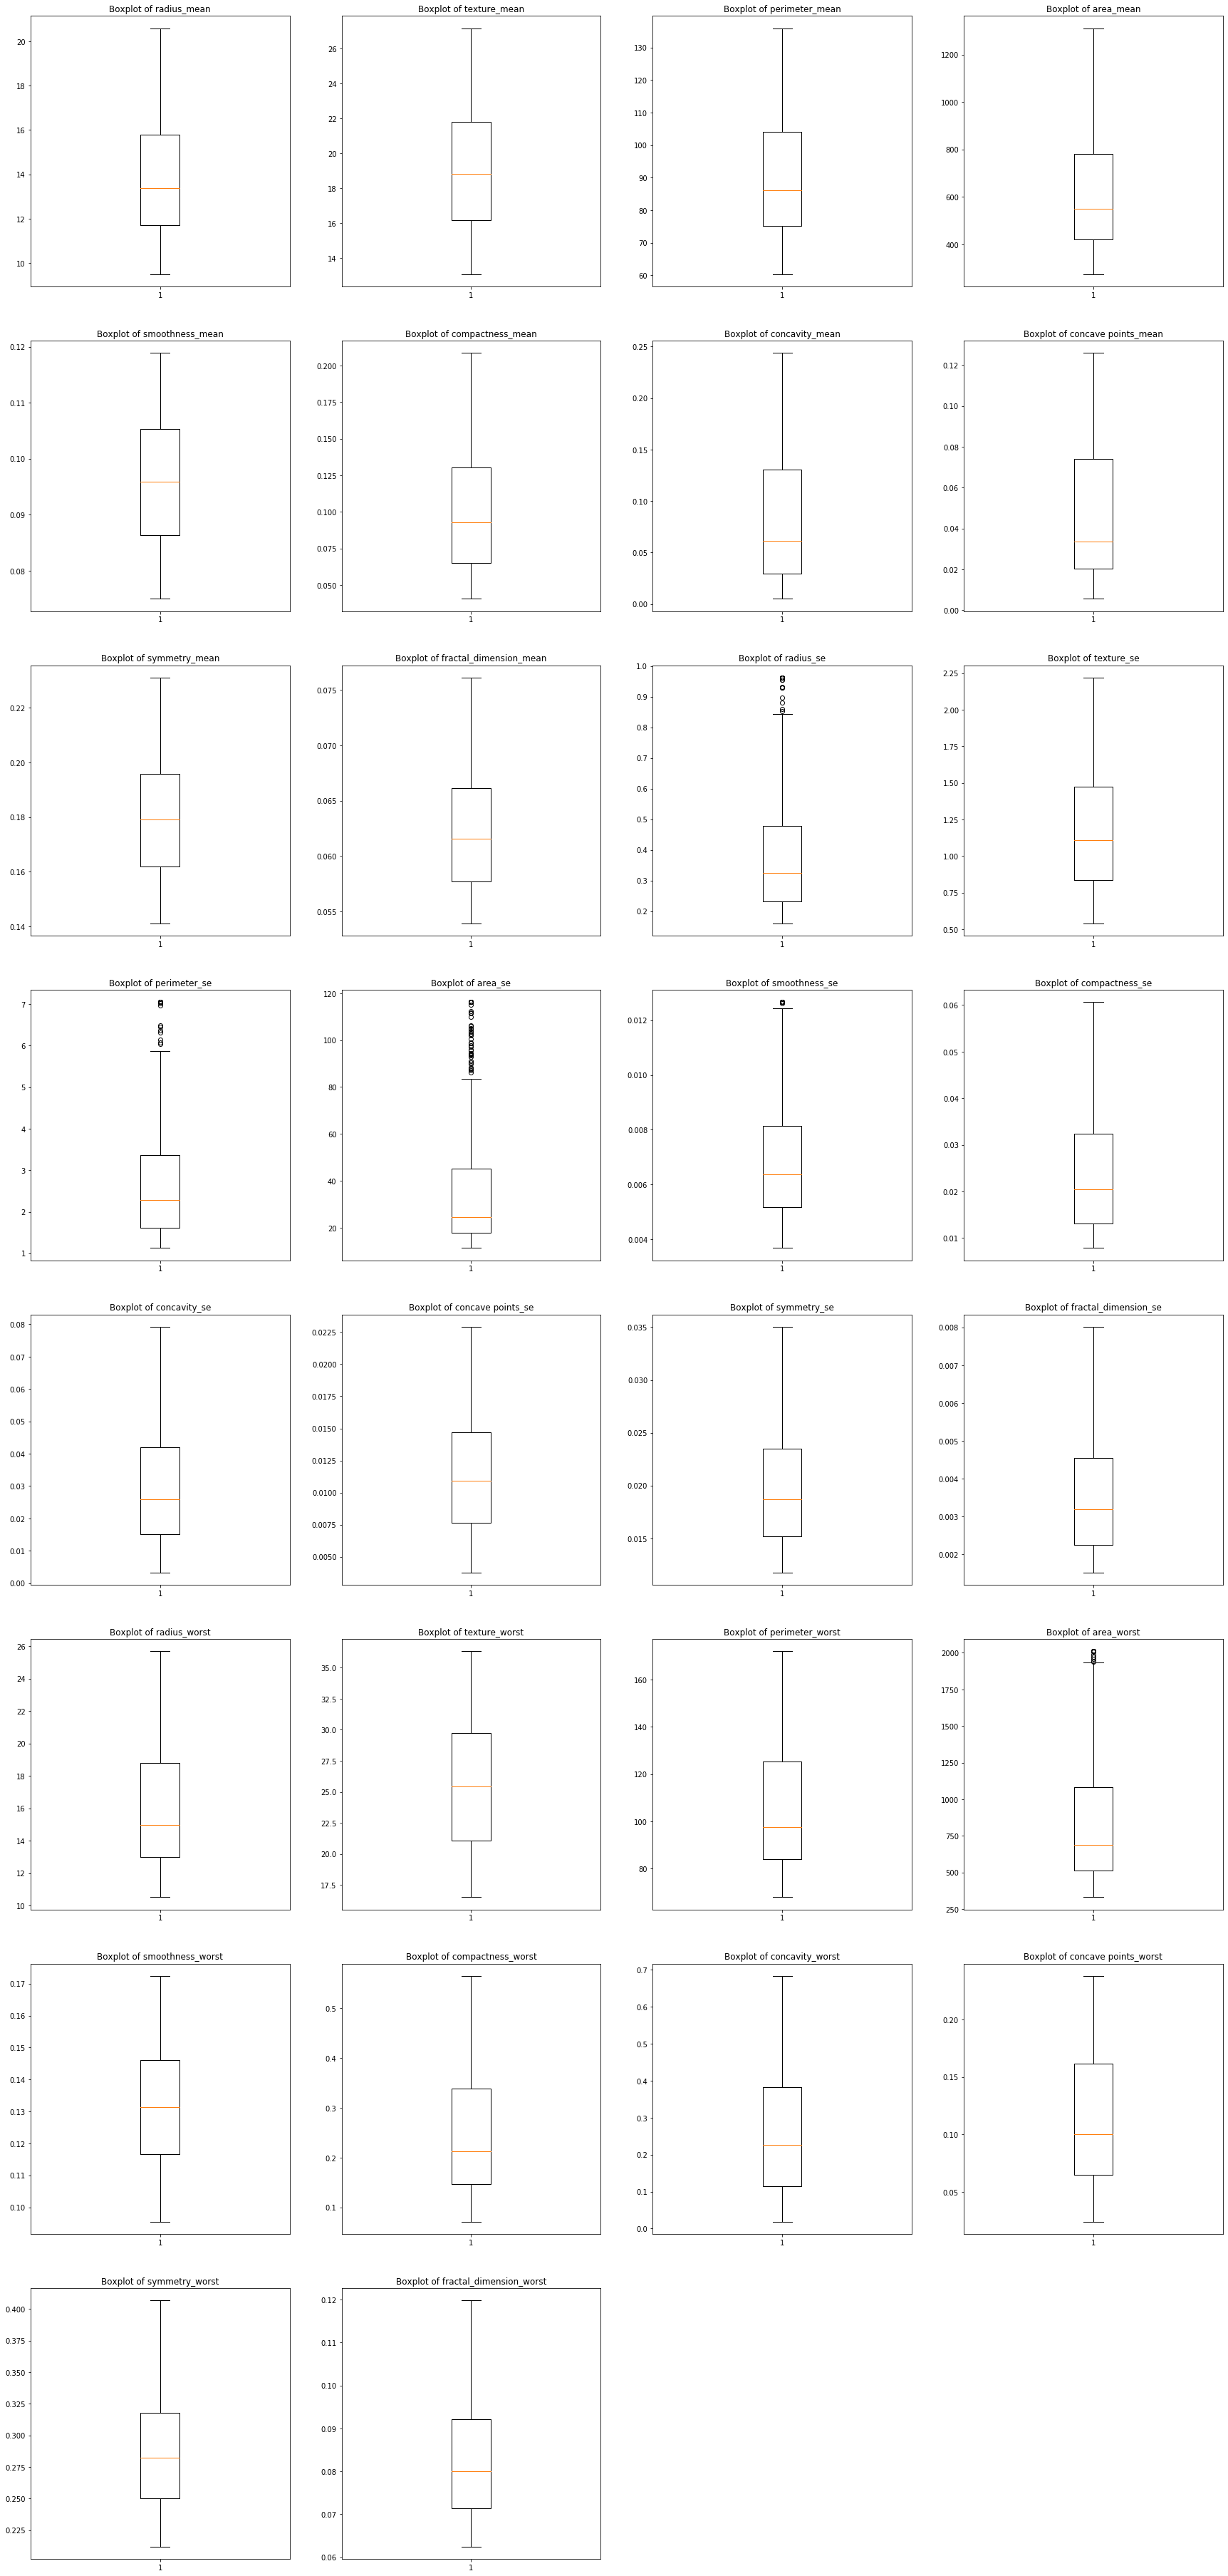

In [16]:
#Visual examination of outliers:
plt.figure(figsize=(30,250))

for i, column in enumerate(fill_list):
    plt.subplot(len(fill_list), 4, i+1)
    plt.boxplot(df_copy[column])
    plt.title("Boxplot of {}".format(column))
    
plt.show()

In [17]:
df_copy.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.053968,19.217838,91.354534,641.062039,0.096103,0.102693,0.085655,0.047772,0.180568,0.062580,...,16.161476,25.556626,106.398647,856.309490,0.131953,0.248150,0.266325,0.114306,0.288186,0.083340
std,3.180805,3.898115,21.781108,301.032372,0.012455,0.047084,0.070099,0.035054,0.024027,0.006057,...,4.380800,5.630052,30.189145,482.354358,0.020740,0.135969,0.189235,0.062315,0.050555,0.015442
min,9.504000,13.080000,60.340000,273.900000,0.074970,0.040520,0.004967,0.005592,0.141100,0.053910,...,10.510000,16.510000,67.840000,330.700000,0.095450,0.070940,0.018240,0.023810,0.212100,0.062510
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,20.580000,27.150000,135.900000,1311.000000,0.118900,0.208700,0.243900,0.125900,0.231000,0.076130,...,25.680000,36.320000,172.000000,2010.000000,0.172400,0.564600,0.683300,0.237800,0.406600,0.119800


Upon further consideration, each value in the dataset will be kept. Given that this is medical data, every value is real and has value. Higher values are indicative of real, more serious conditions. Additionally, there are no obvious entry errors or extreme instances affecting the rest of the data, based on the boxplots and .describe() summary statisitcs. In addition, winsorization did not seem to significantly impact summary statistics  (i.e. mean), suggesting that the potenital outliers do not drastically change the data either way.

### Gradient Boosting Model

Let's build a Gradient Boosting Model first, in order to understand which features are important.

In [18]:
X = df
# already defined y = df.diagnosis

# Create training and test sets
offset = int(X.shape[0] * .8)

#Put 80% of the data into training set
X_train, y_train = X[:offset], y[:offset]

#Put 20% into the test set
X_test, y_test = X[offset:], y[offset:]


In [19]:
#Build model

params = {'n_estimators': 500}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [20]:
clf.score(X_test, y_test)

0.9912280701754386

In [21]:
cross_val_score(clf, X_test, y_test, cv=5)

array([0.91666667, 0.91304348, 0.95652174, 0.90909091, 0.95454545])

This is a good score, though overfitting appears to be somehwat of an issue.

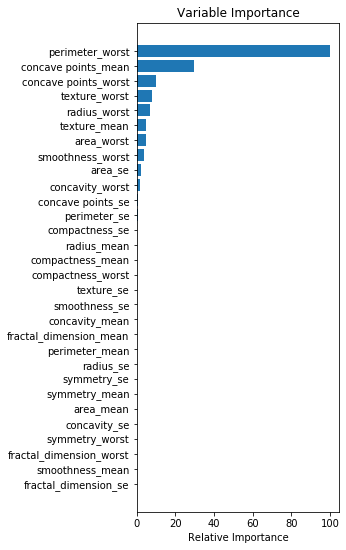

In [22]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(8,9))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

The most important features are:
    
    perimeter_worst
    concave points_mean
    concave points_worst
    texture_worst
    radius_worst
    texture_mean
    area_worst
    smoothness_worst
    area_se
    concavity_worst
    
Let's re-run the model using only the important features.

In [23]:
feature_list = [
    'perimeter_worst',
    'concave points_mean',
   'concave points_worst',
    'texture_worst',
    'radius_worst',
    'texture_mean',
    'area_worst',
    'smoothness_worst',
    'area_se',
    'concavity_worst'
]

X = df[feature_list]
# already defined y = df.diagnosis

# Create training and test sets
offset = int(X.shape[0] * .8)

#Put 80% of the data into training set
X_train, y_train = X[:offset], y[:offset]

#Put 20% into the test set
X_test, y_test = X[offset:], y[offset:]

In [24]:
#Build model

params = {'n_estimators': 500}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [25]:
clf.score(X_test, y_test)

0.9649122807017544

In [27]:
cvs = cross_val_score(clf, X_test, y_test, cv=5)
cvs

array([0.91666667, 0.86956522, 0.91304348, 0.90909091, 1.        ])

In [29]:
avg_cvs = cvs.sum()/len(cvs)
avg_cvs

0.92167325428195

### Neural Network Model

In [34]:
mlp = MLPClassifier(hidden_layer_sizes=(1000,100,10))
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1000, 100, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [35]:
mlp.score(X_test, y_test)

0.9035087719298246

In [36]:
cvs = cross_val_score(mlp, X_test, y_test, cv=5)
cvs

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0.25      , 0.52173913, 0.95652174, 0.90909091, 0.95454545])

In [37]:
avg_cvs = cvs.sum()/len(cvs)
avg_cvs

0.7183794466403162

In [38]:
mlp = MLPClassifier(hidden_layer_sizes=(1000,100,10),
                   activation='logistic')
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1000, 100, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [39]:
mlp.score(X_test, y_test)

0.956140350877193

In [40]:
cvs = cross_val_score(mlp, X_test, y_test, cv=5)
cvs

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

array([0.75      , 0.82608696, 0.7826087 , 0.90909091, 1.        ])

In [41]:
avg_cvs = cvs.sum()/len(cvs)
avg_cvs

0.8535573122529645

The cross validation scores for the neural network may not be entirely accurate, as there are convergence warnings for most of the array outputs, aside from cases in which the score was very high. 

Overall, gradient boosting and neural network models both achieved high performance marks, with the gradient boosting classifier slightly outperforming for both test scores, and cross validation scores.

Because of the number of rows being 569, time generally wasn't a significant factor. Adding extra hidden layers appeared to slow down the neural network only slightly, but increasing the size of the layers did so more significantly.